In [373]:
import pandas as pd
import numpy as np
import yfinance as yf

### Step 1:  Identify datasets and Data Cleaning

In [374]:
#Calling 3 datasets of stock market data for NASDAQ 100, NASDAQ Technology and Volatility Index
ndx_data = yf.download('^NDX', start ='2010-01-01', end = '2024-12-31')
ndxt_data = yf.download('^NDXT', start='2010-01-01', end='2024-12-31')
vix_data = yf.download('^VIX', start='2010-01-01', end = '2024-12-31')


# ndx_data.to_csv('ndx.csv')
# ndxt_data.to_csv('ndxt.csv')
# vix_data.to_csv('vix.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [375]:
# ndx_data.reset_index(inplace=True)
# ndxt_data.reset_index(inplace=True)
# vix_data.reset_index(inplace=True)
# ndx_data

##### Remove the columns that I do need from the 3 datasets

In [376]:
ndx_data=ndx_data.drop(['High','Low','Open','Volume'],axis=1)
ndxt_data = ndxt_data.drop(['High','Low','Open','Volume'],axis=1)
vix_data = vix_data.drop(['High','Low','Open','Volume'], axis=1)

##### Call the first macroeconomic dataframe Unemployment rates 

In [377]:
unemployment_data = pd.read_csv('UNRATE.csv', sep=',')
unemployment_data.dropna(inplace=True)
unemployment_data

,observation_date,UNRATE
0,2010-01-01,9.8
1,2010-02-01,9.8
2,2010-03-01,9.9
3,2010-04-01,9.9
4,2010-05-01,9.6
...,...,...
174,2024-07-01,4.3
175,2024-08-01,4.2
176,2024-09-01,4.1
177,2024-10-01,4.1


##### Call second macroeconomic dataset Inflation rates

In [378]:
inflation_data = pd.read_csv('T10YIE.csv')
inflation_data.dropna(inplace=True)
inflation_data

,observation_date,T10YIE
0,2010-01-04,2.38
1,2010-01-05,2.34
2,2010-01-06,2.37
3,2010-01-07,2.41
4,2010-01-08,2.42
...,...,...
3906,2024-12-24,2.35
3908,2024-12-26,2.35
3909,2024-12-27,2.34
3910,2024-12-30,2.31


##### Inflation handling | Unemployement handling

In [379]:
#In contrast to the unemployment dataset the Inflation is not in monthly rates but daily. So in order to merge and use the data
#They have to be of the same length and type. They need a lot of data handling.

#Here I rename for both datasets the column of the Date to date and turn it to datetime
inflation_data.columns = inflation_data.columns.str.strip()  # Removes leading/trailing spaces
inflation_data['observation_date'] = pd.to_datetime(inflation_data['observation_date'])
inflation_data.rename(columns={'observation_date':'Date'}, inplace=True)

unemployment_data.colums = unemployment_data.columns.str.strip()
unemployment_data['observation_date'] = pd.to_datetime(unemployment_data['observation_date'])
unemployment_data.rename(columns={'observation_date':'Date'}, inplace=True)

inflation_data,unemployment_data

C:\Users\Nickos\AppData\Local\Temp\ipykernel_20004\2516609010.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  unemployment_data.colums = unemployment_data.columns.str.strip()


(           Date  T10YIE
 0    2010-01-04    2.38
 1    2010-01-05    2.34
 2    2010-01-06    2.37
 3    2010-01-07    2.41
 4    2010-01-08    2.42
 ...         ...     ...
 3906 2024-12-24    2.35
 3908 2024-12-26    2.35
 3909 2024-12-27    2.34
 3910 2024-12-30    2.31
 3911 2024-12-31    2.34
 
 [3752 rows x 2 columns],
           Date  UNRATE
 0   2010-01-01     9.8
 1   2010-02-01     9.8
 2   2010-03-01     9.9
 3   2010-04-01     9.9
 4   2010-05-01     9.6
 ..         ...     ...
 174 2024-07-01     4.3
 175 2024-08-01     4.2
 176 2024-09-01     4.1
 177 2024-10-01     4.1
 178 2024-11-01     4.2
 
 [179 rows x 2 columns])

##### Set the dates to indexes

In [380]:
#This will alows to merge the data with the stock market data in dates
inflation_data.set_index('Date', inplace=True)
unemployment_data.set_index('Date', inplace=True)

inflation_data, unemployment_data

(            T10YIE
 Date              
 2010-01-04    2.38
 2010-01-05    2.34
 2010-01-06    2.37
 2010-01-07    2.41
 2010-01-08    2.42
 ...            ...
 2024-12-24    2.35
 2024-12-26    2.35
 2024-12-27    2.34
 2024-12-30    2.31
 2024-12-31    2.34
 
 [3752 rows x 1 columns],
             UNRATE
 Date              
 2010-01-01     9.8
 2010-02-01     9.8
 2010-03-01     9.9
 2010-04-01     9.9
 2010-05-01     9.6
 ...            ...
 2024-07-01     4.3
 2024-08-01     4.2
 2024-09-01     4.1
 2024-10-01     4.1
 2024-11-01     4.2
 
 [179 rows x 1 columns])

##### Convert inflation to monthly

In [381]:
#Here I convert the inflation to monthly value by selecting the mean of each month
monthly_inflation = inflation_data.resample('M').mean()
monthly_inflation

C:\Users\Nickos\AppData\Local\Temp\ipykernel_20004\1950397476.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_inflation = inflation_data.resample('M').mean()


,T10YIE
Date,
2010-01-31,2.358421
2010-02-28,2.272105
2010-03-31,2.219130
2010-04-30,2.345909
2010-05-31,2.113000
...,...
2024-08-31,2.110000
2024-09-30,2.107500
2024-10-31,2.285909


##### Stock data to monthly

In [382]:
#Convert stocks to monthly taking the mean of each Month but first make the date the index
ndx_data.index = pd.to_datetime(ndx_data.index)
ndxt_data.index = pd.to_datetime(ndxt_data.index)
vix_data.index = pd.to_datetime(vix_data.index)

monthly_ndxt_data =ndxt_data.resample('M').mean()
monthly_vix_data = vix_data.resample('M').mean() 
monthly_ndx_data = ndx_data.resample('M').mean()


C:\Users\Nickos\AppData\Local\Temp\ipykernel_20004\2990415575.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ndxt_data =ndxt_data.resample('M').mean()
C:\Users\Nickos\AppData\Local\Temp\ipykernel_20004\2990415575.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_vix_data = vix_data.resample('M').mean()
C:\Users\Nickos\AppData\Local\Temp\ipykernel_20004\2990415575.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ndx_data = ndx_data.resample('M').mean()


##### Stock data handling

In [383]:
#Because the data from yahoofinance are 2 leveled and this makes it impossible to merge with the macroeconomic data, 
#Remove the 1 layer and rename the second one to so I do not lose any columns in the process

monthly_ndx_data.columns = monthly_ndx_data.columns.get_level_values(1)  # Extract the second level 
monthly_ndx_data.rename(columns={'^NDX':'NDX_Close'},inplace=True)
monthly_ndxt_data.columns= monthly_ndxt_data.columns.get_level_values(1)
monthly_ndxt_data.rename(columns={'^NDXT':'NDXT_Close'},inplace=True)
monthly_vix_data.columns=monthly_vix_data.columns.get_level_values(1)
monthly_vix_data.rename(columns={'^VIX':'VIX_Close'},inplace=True)


print(monthly_ndx_data.head(5))
print(f'\n{monthly_ndxt_data.head(5)}')
print(f'\n{monthly_vix_data.head(5)}')

Ticker        NDX_Close
Date                   
2010-01-31  1850.219470
2010-02-28  1784.734735
2010-03-31  1920.616078
2010-04-30  2010.960013
2010-05-31  1892.732996

Ticker       NDXT_Close
Date                   
2010-01-31  1122.320004
2010-02-28  1080.598434
2010-03-31  1159.886963
2010-04-30  1218.871448
2010-05-31  1143.466516

Ticker      VIX_Close
Date                 
2010-01-31  20.643158
2010-02-28  22.540000
2010-03-31  17.767391
2010-04-30  17.424286
2010-05-31  31.929500


##### Stock data merge

In [384]:
merge_stock = pd.merge(monthly_ndx_data, monthly_ndxt_data, on='Date')
stock_data = pd.merge(merge_stock,monthly_vix_data, on='Date')
stock_data

Ticker,NDX_Close,NDXT_Close,VIX_Close
Date,,,
2010-01-31,1850.219470,1122.320004,20.643158
2010-02-28,1784.734735,1080.598434,22.540000
2010-03-31,1920.616078,1159.886963,17.767391
2010-04-30,2010.960013,1218.871448,17.424286
2010-05-31,1892.732996,1143.466516,31.929500
...,...,...,...
2024-08-31,19070.050249,10058.272061,19.312273
2024-09-30,19434.121484,10114.234570,17.769000
2024-10-31,20172.450917,10511.156505,19.960870


In [385]:
#Make sure that they have the same dates as indexes

monthly_inflation = monthly_inflation.reindex(monthly_ndx_data.index)
monthly_inflation

,T10YIE
Date,
2010-01-31,2.358421
2010-02-28,2.272105
2010-03-31,2.219130
2010-04-30,2.345909
2010-05-31,2.113000
...,...
2024-08-31,2.110000
2024-09-30,2.107500
2024-10-31,2.285909


In [386]:
#Same here the index of unemployement rates has to be the same as the rest. I had some issues here not sure why
#It was setting all the values to NaN so I found the method='nearest' and it kept the original values

monthly_unemploy = unemployment_data.reindex(monthly_inflation.index,method='nearest')
monthly_unemploy

,UNRATE
Date,
2010-01-31,9.8
2010-02-28,9.9
2010-03-31,9.9
2010-04-30,9.6
2010-05-31,9.4
...,...
2024-08-31,4.1
2024-09-30,4.1
2024-10-31,4.2


##### Macro merging

In [387]:
macro_merge = pd.merge(monthly_inflation, monthly_unemploy, on='Date')
macro_merge

,T10YIE,UNRATE
Date,,
2010-01-31,2.358421,9.8
2010-02-28,2.272105,9.9
2010-03-31,2.219130,9.9
2010-04-30,2.345909,9.6
2010-05-31,2.113000,9.4
...,...,...
2024-08-31,2.110000,4.1
2024-09-30,2.107500,4.1
2024-10-31,2.285909,4.2


##### Final Merge

In [388]:
project_data = pd.merge(stock_data,macro_merge,on='Date')
project_data

,NDX_Close,NDXT_Close,VIX_Close,T10YIE,UNRATE
Date,,,,,
2010-01-31,1850.219470,1122.320004,20.643158,2.358421,9.8
2010-02-28,1784.734735,1080.598434,22.540000,2.272105,9.9
2010-03-31,1920.616078,1159.886963,17.767391,2.219130,9.9
2010-04-30,2010.960013,1218.871448,17.424286,2.345909,9.6
2010-05-31,1892.732996,1143.466516,31.929500,2.113000,9.4
...,...,...,...,...,...
2024-08-31,19070.050249,10058.272061,19.312273,2.110000,4.1
2024-09-30,19434.121484,10114.234570,17.769000,2.107500,4.1
2024-10-31,20172.450917,10511.156505,19.960870,2.285909,4.2


##### Last check for nans, zeros

In [389]:
project_data.isna().sum(), project_data.isnull().sum()

(NDX_Close     0
 NDXT_Close    0
 VIX_Close     0
 T10YIE        0
 UNRATE        0
 dtype: int64,
 NDX_Close     0
 NDXT_Close    0
 VIX_Close     0
 T10YIE        0
 UNRATE        0
 dtype: int64)

##### Calculate the daily returns for the stock data

In [390]:
project_data['NDXT_returns']=project_data['NDXT_Close'].pct_change()
project_data['NDX_returns']=project_data['NDX_Close'].pct_change()
project_data['VIX_returns']=project_data['VIX_Close'].pct_change()
project_data

,NDX_Close,NDXT_Close,VIX_Close,T10YIE,UNRATE,NDXT_returns,NDX_returns,VIX_returns
Date,,,,,,,,
2010-01-31,1850.219470,1122.320004,20.643158,2.358421,9.8,NaN,NaN,NaN
2010-02-28,1784.734735,1080.598434,22.540000,2.272105,9.9,-0.037174,-0.035393,0.091887
2010-03-31,1920.616078,1159.886963,17.767391,2.219130,9.9,0.073375,0.076135,-0.211740
2010-04-30,2010.960013,1218.871448,17.424286,2.345909,9.6,0.050854,0.047039,-0.019311
2010-05-31,1892.732996,1143.466516,31.929500,2.113000,9.4,-0.061865,-0.058791,0.832471
...,...,...,...,...,...,...,...,...
2024-08-31,19070.050249,10058.272061,19.312273,2.110000,4.1,-0.063550,-0.037767,0.334642
2024-09-30,19434.121484,10114.234570,17.769000,2.107500,4.1,0.005564,0.019091,-0.079912
2024-10-31,20172.450917,10511.156505,19.960870,2.285909,4.2,0.039244,0.037991,0.123354


In [391]:
#Remove the Nan value that the calculation of daily returns creates
project_data.dropna(inplace=True)
project_data

#project_data.to_csv('FinalMergedAfterHandling.csv')

### Step 2:Visualize data and compute descriptive statistics

In [392]:
import matplotlib .pyplot as plt
import seaborn as sns

##### Descriptive stats

In [393]:
print(f'NASDAQ Tech Descriptives {project_data['NDXT_Close'].describe()},\n\nNASDAQ 100 Descriptives {project_data['NDX_Close'].describe()}, \n\nVolatility Index Descriptives{project_data['VIX_Close'].describe}')

NASDAQ Tech Descriptives count      179.000000
mean      4301.069620
std       2895.104840
min       1080.598434
25%       1780.644520
50%       3513.328192
75%       6601.052530
max      10775.856104
Name: NDXT_Close, dtype: float64,

NASDAQ 100 Descriptives count      179.000000
mean      7627.391085
std       5230.943779
min       1784.734735
25%       3345.699333
50%       5816.113501
75%      11867.141955
max      21517.410547
Name: NDX_Close, dtype: float64, 

Volatility Index Descriptives<bound method NDFrame.describe of Date
2010-02-28    22.540000
2010-03-31    17.767391
2010-04-30    17.424286
2010-05-31    31.929500
2010-06-30    29.916364
                ...    
2024-08-31    19.312273
2024-09-30    17.769000
2024-10-31    19.960870
2024-11-30    16.121000
2024-12-31    15.792000
Name: VIX_Close, Length: 179, dtype: float64>


In [394]:
#Monthly Returns Descriptives
print(f'NASDAQ TECH returns \n{project_data['NDXT_returns'].describe()},\n\n NASDAQ 100 Returns\n{project_data['NDX_returns'].describe()},\n\nVolatility Returns\n{project_data['VIX_returns'].describe()}')

NASDAQ TECH returns 
count    179.000000
mean       0.013855
std        0.047494
min       -0.185748
25%       -0.014810
50%        0.018401
75%        0.044312
max        0.124244
Name: NDXT_returns, dtype: float64,

 NASDAQ 100 Returns
count    179.000000
mean       0.014585
std        0.039456
min       -0.157249
25%       -0.007370
50%        0.019760
75%        0.040550
max        0.092380
Name: NDX_returns, dtype: float64,

Volatility Returns
count    179.000000
mean       0.018566
std        0.238164
min       -0.311259
25%       -0.103094
50%       -0.013627
75%        0.085917
max        1.941412
Name: VIX_returns, dtype: float64


In [395]:
#Macro Describe
print(f'Inflation Descriptives\n{project_data['T10YIE'].describe()},\n\n Unemployment Descriptives\n{project_data['UNRATE'].describe()}')

Inflation Descriptives
count    179.000000
mean       2.053297
std        0.344037
min        0.986818
25%        1.818612
50%        2.122273
75%        2.303810
max        2.884000
Name: T10YIE, dtype: float64,

 Unemployment Descriptives
count    179.000000
mean       5.743017
std        2.206119
min        3.400000
25%        3.900000
50%        5.000000
75%        7.500000
max       14.800000
Name: UNRATE, dtype: float64


##### NDX, NDXT, VIT visualizations

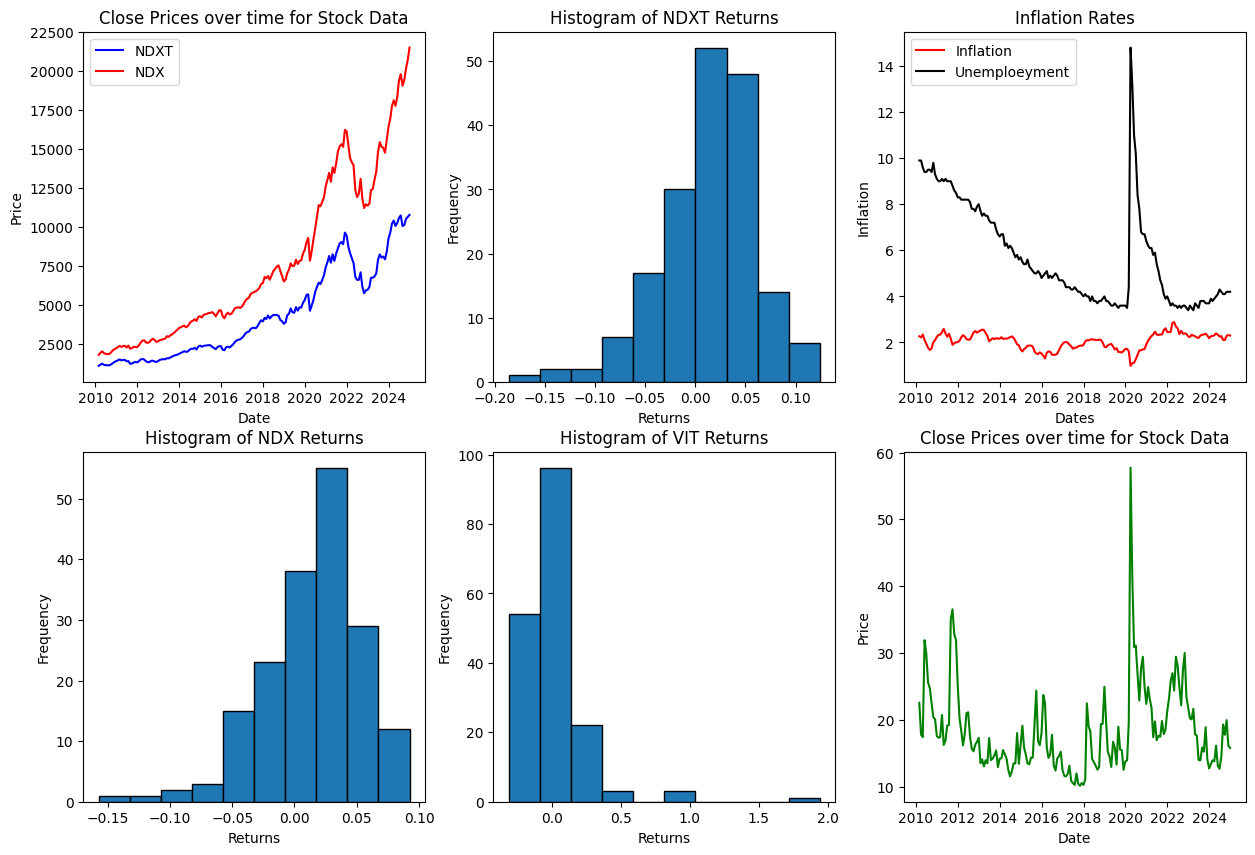

In [396]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
axs[0,0].plot(project_data['NDXT_Close'], color='Blue', label='NDXT')
axs[0,0].plot(project_data['NDX_Close'],color='Red', label='NDX')
axs[0,0].set_title('Close Prices over time for Stock Data')
axs[0,0].set_xlabel('Date')
axs[0,0].set_ylabel('Price')
axs[0,0].legend()

axs[0,1].hist(project_data['NDXT_returns'], edgecolor='Black')
axs[0,1].set_title('Histogram of NDXT Returns')
axs[0,1].set_xlabel('Returns')
axs[0,1].set_ylabel('Frequency')


axs[0,2].plot(project_data['T10YIE'], color='Red', label = 'Inflation')
axs[0,2].plot(project_data['UNRATE'],color='Black', label='Unemploeyment')
axs[0,2].set_title("Inflation Rates")
axs[0,2].set_xlabel('Dates')
axs[0,2].set_ylabel('Inflation')
axs[0,2].legend()


axs[1,0].hist(project_data['NDX_returns'], edgecolor='Black')
axs[1,0].set_title('Histogram of NDX Returns')
axs[1,0].set_xlabel('Returns')
axs[1,0].set_ylabel('Frequency')

axs[1,1].hist(project_data['VIX_returns'], edgecolor='Black')
axs[1,1].set_title('Histogram of VIT Returns')
axs[1,1].set_xlabel('Returns')
axs[1,1].set_ylabel('Frequency')

axs[1,2].plot(project_data['VIX_Close'], color = 'Green',label='VIX')
axs[1,2].set_title('Close Prices over time for Stock Data')
axs[1,2].set_xlabel('Date')
axs[1,2].set_ylabel('Price')

plt.tight_layout
plt.show()

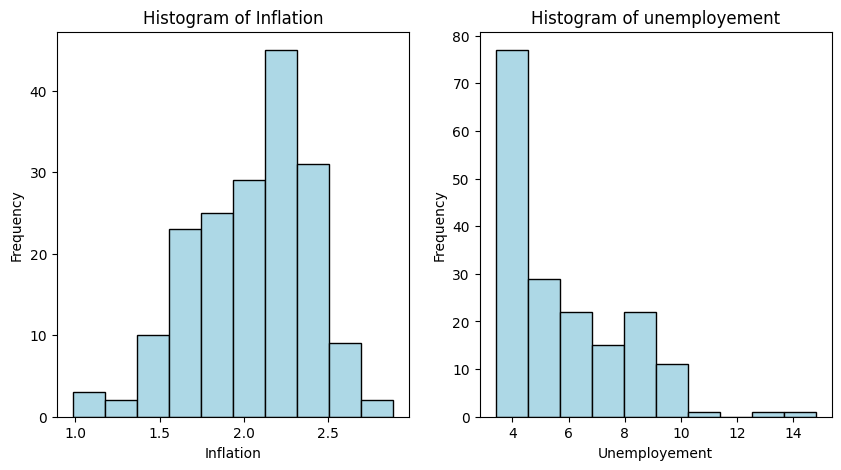

In [397]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].hist(project_data['T10YIE'], edgecolor='Black', color='LightBlue')
ax[0].set_title('Histogram of Inflation')
ax[0].set_xlabel('Inflation')
ax[0].set_ylabel('Frequency')

ax[1].hist(project_data['UNRATE'], edgecolor='Black', color='LightBlue')
ax[1].set_xlabel('Unemployement')
ax[1].set_title('Histogram of unemployement')
ax[1].set_ylabel('Frequency')

plt.show()

In [398]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
project_data['NDXT_Close_standar'] = scaler.fit_transform(project_data['NDXT_Close'].values.reshape(-1, 1))
project_data['NDX_Close_standar'] = scaler.fit_transform(project_data['NDX_Close'].values.reshape(-1,1))
project_data['VIX_Close_standar'] = scaler.fit_transform(project_data['VIX_Close'].values.reshape(-1,1))

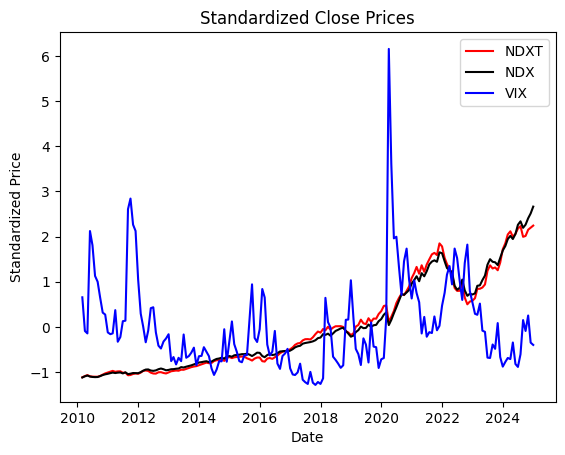

In [399]:
plt.plot(project_data['NDXT_Close_standar'], color='Red', label='NDXT')
plt.plot(project_data['NDX_Close_standar'], color='Black', label = 'NDX')
plt.plot(project_data['VIX_Close_standar'],color='Blue', label ='VIX')
plt.title('Standardized Close Prices')
plt.xlabel('Date')
plt.ylabel('Standardized Price')
plt.legend()
plt.show()

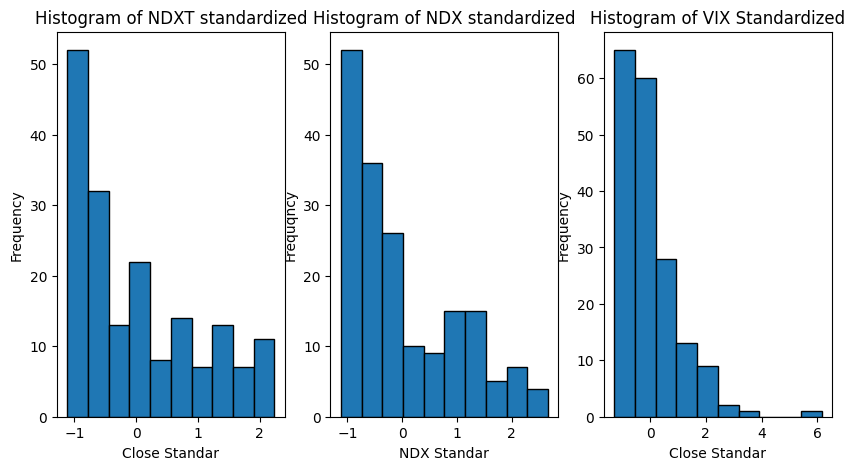

In [400]:
fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].hist(project_data['NDXT_Close_standar'],edgecolor='Black')
axs[0].set_title('Histogram of NDXT standardized')
axs[0].set_xlabel('Close Standar')
axs[0].set_ylabel('Frequency')

axs[1].hist(project_data['NDX_Close_standar'], edgecolor='Black')
axs[1].set_title('Histogram of NDX standardized')
axs[1].set_xlabel('NDX Standar')
axs[1].set_ylabel('Frequqncy')

axs[2].hist(project_data['VIX_Close_standar'], edgecolor='Black')
axs[2].set_title('Histogram of VIX Standardized')
axs[2].set_xlabel('Close Standar')
axs[2].set_ylabel('Frequency')

plt.show()

Text(0.5, 1.0, 'NDXT Returns Q-Q plot')

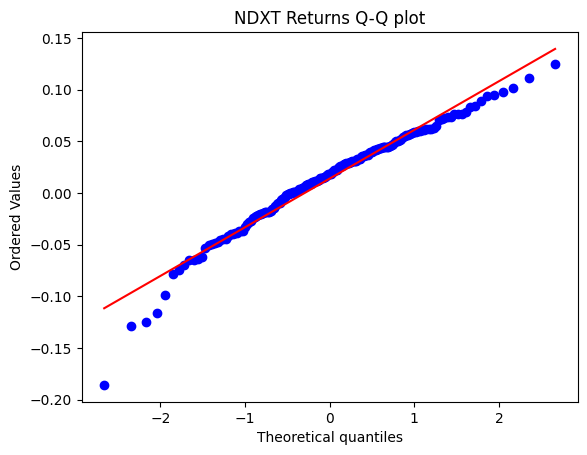

In [401]:
#NDXT Returns Q-Q plot
from scipy import stats
stats.probplot(project_data['NDXT_returns'], dist='norm', plot=plt)
plt.title('NDXT Returns Q-Q plot')

Text(0.5, 1.0, 'NDX Returns Q-Q plot')

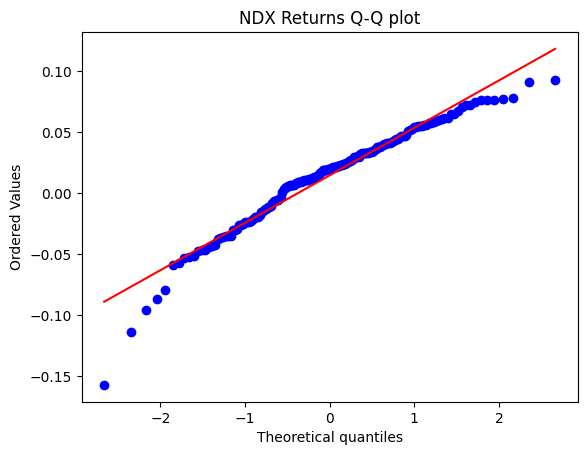

In [402]:
#NDX Returns Q-Q plot
from scipy import stats
stats.probplot(project_data['NDX_returns'], dist='norm', plot=plt)
plt.title('NDX Returns Q-Q plot')

### Step 4: Hypotheses Testing

##### H1(Two Sample-ttest): Is there a significant difference in Nasdaq Tech Index (NDXT) returns between periods of high and low inflation?
Ho:The mean NDXT returns are the same during high and low inflation periods.

In [403]:
#First I have to seperate data to high inflation and low inflation

high_inflation = project_data[project_data['T10YIE']> project_data['T10YIE'].median()]
low_inflation =project_data[project_data['T10YIE']<= project_data['T10YIE'].median()]

In [404]:
#Two sample t-test

from scipy.stats import ttest_ind

high_inflation_returns = high_inflation["NDXT_returns"].dropna()
low_inflation_returns = low_inflation["NDXT_returns"].dropna()

t_stat_tstt, p_value_tstt = ttest_ind(high_inflation_returns, low_inflation_returns, equal_var=False)
print(f"T-Statistic: {t_stat_tstt}, P-Value: {p_value_tstt}")

if p_value_tstt <= 0.05:
    print("Prediction is statistically significant.")
else:
    print('There is no statistical Significance')

T-Statistic: -1.1034238089554678, P-Value: 0.271343315655925
There is no statistical Significance


##### H2(Paired t-test):Does market volatility (VIX) significantly impact Nasdaq-100 (NDX) returns during high-volatility vs. low-volatility periods?

H0: The average NDX returns during high-volatility periods are the same as during low-volatility periods.

In [405]:
#First split the data to low and high volatility

high_volatility = project_data[project_data['VIX_Close']>project_data['VIX_Close'].median()]
low_volatility = project_data[project_data['VIX_Close']<=project_data['VIX_Close'].median()]

In [406]:
# Paired t-test

from scipy.stats import ttest_rel

high_vol_returns = high_volatility['NDX_returns'].dropna()
low_vol_returns = low_volatility['NDX_returns'].dropna()

#I have to check if they have equal lenght because paired test requires equal length
print(f"Length of high_vol_returns: {len(high_vol_returns)}")
print(f"Length of low_vol_returns: {len(low_vol_returns)}")


Length of high_vol_returns: 89
Length of low_vol_returns: 90


In [407]:
#Randomly drop one value from low volatility
low_vol_returns = low_vol_returns.sample(len(high_vol_returns), random_state=20)

In [408]:
t_stat_rel, p_value_rel = ttest_rel(high_vol_returns, low_vol_returns)
print(f"T-Statistic: {t_stat_rel}, P-Value: {p_value_rel}")

if p_value_rel <= 0.05:
    print("Prediction is statistically significant.")
else:
    print('There is no statistical Significance')

T-Statistic: -3.4855174187046796, P-Value: 0.0007682417998508049
Prediction is statistically significant.


##### H3(Binomial Test):Is the Nasdaq-100 index more likely to increase after periods of low unemployment than after periods of high unemployment?

H0:The probability of the Nasdaq-100 increasing after low unemployment periods is 50%.

In [409]:
#Identify Positive NDX Movements

project_data['NDX_Movement'] = (project_data['NDX_returns'] > 0).astype(int) #convert to binary the positive returns(1 positive, 0 negative)
low_unemployment = project_data[project_data['UNRATE'] <= project_data['UNRATE'].median()]
positive_movements = low_unemployment['NDX_Movement']

In [410]:
#Binomial Test
from scipy.stats import binomtest

num_successes = positive_movements.sum() #the number of positive movements
num_trials = len(positive_movements) # total number of trials
p_value_binom = binomtest(num_successes, num_trials, p=0.5, alternative="greater")
print(f"Number of Positive Movements: {num_successes}, P-Value: {p_value_binom}")


Number of Positive Movements: 64, P-Value: BinomTestResult(k=64, n=94, alternative='greater', statistic=0.6808510638297872, pvalue=0.0002939511127062821)


### Step 5: Extend with machine learning predictions

##### Predict NDX Movements

In [411]:
#Train test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

X= project_data[['NDX_Close_standar', 'NDXT_Close_standar', 'VIX_Close_standar', 'T10YIE', 'UNRATE']]
y_pred = project_data['NDX_returns'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y_pred, test_size = 0.25, random_state=101)

kf = KFold(n_splits=10, shuffle=True, random_state=101)

In [412]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression().fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))
print("Linear Regression R2:", r2_score(y_test, y_pred_lin))

Linear Regression MSE: 0.000945311953593229
Linear Regression R2: 0.25843801731015514


In [413]:
#10 fold cross validation
lin_reg_cv_scores = cross_val_score(lin_reg, X, y_pred, cv=kf, scoring='neg_mean_squared_error')
lin_reg_cv_mse_mean = -lin_reg_cv_scores.mean()
lin_reg_cv_mse_std = lin_reg_cv_scores.std()

print(f"  Cross-Validation MSE: Mean = {lin_reg_cv_mse_mean:.4f}, Std = {lin_reg_cv_mse_std:.4f}")

  Cross-Validation MSE: Mean = 0.0012, Std = 0.0005


In [414]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random R2:", r2_score(y_test, y_pred_rf))

Random Forest MSE: 0.0009926900205360684
Random R2: 0.221271690231991


In [415]:
#10 fold Random Forest 
rf_cv_scores = cross_val_score(rf, X, y_pred, cv=kf, scoring='neg_mean_squared_error')
rf_cv_mse_mean = -rf_cv_scores.mean()
rf_cv_mse_std = rf_cv_scores.std()
print(f"  Cross-Validation MSE: Mean = {rf_cv_mse_mean:.4f}, Std = {rf_cv_mse_std:.4f}")


  Cross-Validation MSE: Mean = 0.0013, Std = 0.0009


In [416]:
#SVR Regression
from sklearn.svm import SVR

svm = SVR().fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM MSE:", mean_squared_error(y_test, y_pred_svm))
print("SVM R2:", r2_score(y_test, y_pred_svm))

SVM MSE: 0.0016348567213660535
SVM R2: -0.28248414409843314


In [417]:
#10 fold SVR
svm_cv_scores = cross_val_score(svm, X, y_pred, cv=kf, scoring='neg_mean_squared_error')
svm_cv_mse_mean = -svm_cv_scores.mean()
svm_cv_mse_std = svm_cv_scores.std()
print(f"  Cross-Validation MSE: Mean = {svm_cv_mse_mean:.4f}, Std = {svm_cv_mse_std:.4f}")


  Cross-Validation MSE: Mean = 0.0022, Std = 0.0006


In [418]:
#Table for nice visualizations
from tabulate import tabulate

results = [
    ['LinearRegression', '0.00094','0.25', '0.0012', '0.0005'],
    ['RandomForest', '0.001','0.17', '0.0014', '0.0009'],
    ['Support Vector Regression', '0.0016', '-0.28', '0.0022', '0.0006']
]

head = ['Model', 'MSE', 'R2','KFold Mean', ' KFold Std']

print(tabulate(results, headers=head, tablefmt='grid'))

+---------------------------+---------+-------+--------------+--------------+
| Model                     |     MSE |    R2 |   KFold Mean |    KFold Std |
+===========================+=========+=======+==============+==============+
| LinearRegression          | 0.00094 |  0.25 |       0.0012 |       0.0005 |
+---------------------------+---------+-------+--------------+--------------+
| RandomForest              | 0.001   |  0.17 |       0.0014 |       0.0009 |
+---------------------------+---------+-------+--------------+--------------+
| Support Vector Regression | 0.0016  | -0.28 |       0.0022 |       0.0006 |
+---------------------------+---------+-------+--------------+--------------+


##### Ho:The model's predictions do not differ significantly from random guesses.

#### Statistical Tests

In [419]:
# Linear Regression vs Random Forest paired test
t_stat_lr_rf, p_value_lr_rf = ttest_rel(-lin_reg_cv_scores, -rf_cv_scores)
print("\nPaired t-test: Linear Regression vs Random Forest")
print(f"  t-statistic: {t_stat_lr_rf:.4f}")
print(f"  p-value: {p_value_lr_rf:.4f}")
if p_value_lr_rf < 0.05:
    print("  Statistically significant difference between Linear Regression and Random Forest.")
else:
    print("  No statistically significant difference between Linear Regression and Random Forest.")



Paired t-test: Linear Regression vs Random Forest
  t-statistic: -1.0067
  p-value: 0.3404
  No statistically significant difference between Linear Regression and Random Forest.


In [420]:
# Linear Regression vs SVR paired test
t_stat_lr_svm, p_value_lr_svm = ttest_rel(-lin_reg_cv_scores, -svm_cv_scores)
print("\nPaired t-test: Linear Regression vs SVR")
print(f"  t-statistic: {t_stat_lr_svm:.4f}")
print(f"  p-value: {p_value_lr_svm:.4f}")
if p_value_lr_svm < 0.05:
    print("  Statistically significant difference between Linear Regression and SVR.")
else:
    print("  No statistically significant difference between Linear Regression and SVR.")


Paired t-test: Linear Regression vs SVR
  t-statistic: -4.4190
  p-value: 0.0017
  Statistically significant difference between Linear Regression and SVR.


In [421]:
# Random Forest vs SVR paired test
t_stat_rf_svm, p_value_rf_svm = ttest_rel(-rf_cv_scores, -svm_cv_scores)
print("\nPaired t-test: Random Forest vs SVR")
print(f"  t-statistic: {t_stat_rf_svm:.4f}")
print(f"  p-value: {p_value_rf_svm:.4f}")
if p_value_rf_svm < 0.05:
    print("  Statistically significant difference between Random Forest and SVR.")
else:
    print("  No statistically significant difference between Random Forest and SVR.")


Paired t-test: Random Forest vs SVR
  t-statistic: -2.9557
  p-value: 0.0161
  Statistically significant difference between Random Forest and SVR.
